## Observations and Insights 

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single dataset

# Display the data table for preview


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
#combining two data into a single dataframe
mouse_data_df = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse ID")
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
mice_no = mouse_data_df["Mouse ID"].value_counts()
print(mice_no)

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = mouse_data_df[mouse_data_df.duplicated( ["Mouse ID", "Timepoint"], keep = False)]
duplicate.head(30)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = mouse_data_df.drop(mouse_data_df.loc[mouse_data_df["Mouse ID"]=="g989"].index, inplace = True)
clean_df = mouse_data_df[mouse_data_df["Mouse ID"]!="g989"]
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice in the clean DataFrame.
new_mice_no = clean_df["Mouse ID"].value_counts()
new_mice_no



k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_df = clean_df.groupby("Drug Regimen").mean()
summary_df = summary_df.drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"],axis = 1)
summary_df = summary_df.rename(columns = {"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})

median = clean_df.groupby("Drug Regimen").median()
summary_df["Median tumor Volume (mm3)"] = median["Tumor Volume (mm3)"]
variance = clean_df.groupby("Drug Regimen").var()
summary_df["Tumor Vol Variance"] = variance["Tumor Volume (mm3)"]
stdv = clean_df.groupby("Drug Regimen").std()
summary_df["Tumor vol Stdev"] = stdv["Tumor Volume (mm3)"]
sem = clean_df.groupby("Drug Regimen").sem()
summary_df["Tumor vol SEM"] = sem["Tumor Volume (mm3)"]

summary_df

,Mean Tumor Volume (mm3),Median tumor Volume (mm3),Tumor Vol Variance,Tumor vol Stdev,Tumor vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#(df.groupby(['A', 'B'])['C']
#         .agg([('average','mean'),('total','sum')])
#         .reset_index())

clean_df1 = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
summary_df1 = clean_df1.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([("Mean Volume", "mean"),("Median Volume", "median"),
                                                                          ("Variance", "var"), ("STDEV", "std"),
                                                                          ("SEM", "sem")])

summary_df1.head()


,Mean Volume,Median Volume,Variance,STDEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0, 0.5, 'Total no of time points for all Mice')

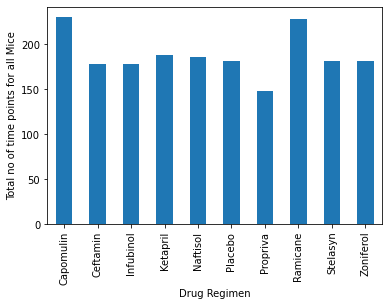

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_grouped = clean_df.groupby("Drug Regimen")["Timepoint"].count()

bar_plot = drug_grouped.plot.bar(drug_grouped)
bar_plot.set_ylabel("Total no of time points for all Mice")




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

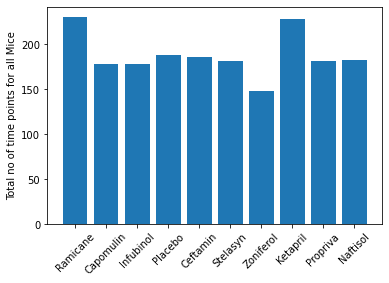

In [68]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = drug_grouped
drug = clean_df["Drug Regimen"].unique()

fig = plt.bar(drug,drug_grouped)
plt.ylabel("Total no of time points for all Mice")
plt.xticks(rotation = "45")


123 female and 125 male


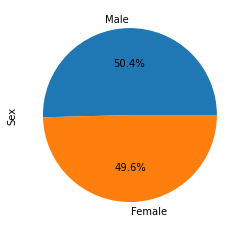

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_male = clean_df[clean_df["Sex"] =="Male"]["Mouse ID"].unique()
mice_female = clean_df[clean_df["Sex"] =="Female"]["Mouse ID"].unique()
female = len(mice_female)
male  = len(mice_male)
#print(f"{female} female and {male} male")
sex = pd.DataFrame({"Sex":[125,123]})
sex
fig = sex.plot(kind = "pie", y = "Sex", labels = ["Male", "Female"],autopct='%1.1f%%', legend = False)

([<matplotlib.patches.Wedge at 0xc10dc1f5e0>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

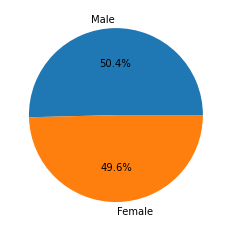

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Numbers = [125,123]
labels = ["Male", "Female"]
plt.pie(Numbers, labels = labels, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#finding final time point for each mouse ID 
final_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
#final_timepoint.head()
final_timepoint = final_timepoint.reset_index()
#final_timepoint.head()



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merging the final_timepoint data with the original clean_data

final_timepoint_df = pd.merge(final_timepoint, clean_df, on = ["Mouse ID", "Timepoint"], how = "left")
final_timepoint_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [182]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
import numpy as np
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_volume = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
      

    # add subset 
    tumor_vol.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    #quartiles = tumor_vol.quantiles([.25, .5, .75])
    quartiles = np.quantile(tumor_vol, [.25, .5, .75])
    lowerq = quartiles[0]
    upperq = quartiles[2]
    iqr = upperq-lowerq
    lower_bound = lowerq - 1.5*iqr
    upper_bound = upperq + 1.5*iqr
    #
    
   #

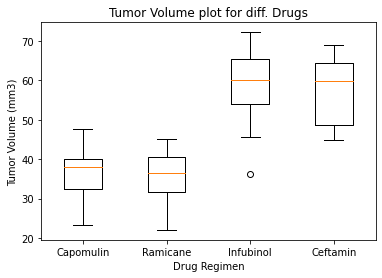

In [186]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume plot for diff. Drugs')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol, labels = treatments)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
